<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/transfer_learning_LeNet_traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classes are as listed below: 

* (0, b'Speed limit (20km/h)')
* (1, b'Speed limit (30km/h)')
* (2, b'Speed limit (50km/h)') 
* (3, b'Speed limit (60km/h)')
* (4, b'Speed limit (70km/h)') 
* (5, b'Speed limit (80km/h)')
* (6, b'End of speed limit (80km/h)') 
* (7, b'Speed limit (100km/h)')
* (8, b'Speed limit (120km/h)') 
* (9, b'No passing')
* (10, b'No passing for vehicles over 3.5 metric tons')
* (11, b'Right-of-way at the next intersection') 
* (12, b'Priority road')
* (13, b'Yield') 
* (14, b'Stop') 
* (15, b'No vehicles')
* (16, b'Vehicles over 3.5 metric tons prohibited') 
* (17, b'No entry')
* (18, b'General caution') 
* (19, b'Dangerous curve to the left')
* (20, b'Dangerous curve to the right') 
* (21, b'Double curve')
* (22, b'Bumpy road') 
* (23, b'Slippery road')
* (24, b'Road narrows on the right') 
* (25, b'Road work')
* (26, b'Traffic signals') 
* (27, b'Pedestrians') 
* (28, b'Children crossing')
* (29, b'Bicycles crossing') 
* (30, b'Beware of ice/snow')
* (31, b'Wild animals crossing')
* (32, b'End of all speed and passing limits') 
* (33, b'Turn right ahead')
* (34, b'Turn left ahead') 
* (35, b'Ahead only') (36, b'Go straight or right')
* (37, b'Go straight or left') 
* (38, b'Keep right') (39, b'Keep left')
* (40, b'Roundabout mandatory') 
* (41, b'End of no passing')
* (42, b'End of no passing by vehicles over 3.5 metric tons')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [ ]:
test_path = '/content/drive/MyDrive/Colab Notebooks/udemy - ml workout/DL and ML Practical Tutorials - Package/Project 5/traffic-signs-data/test.p'
train_path = '/content/drive/MyDrive/Colab Notebooks/udemy - ml workout/DL and ML Practical Tutorials - Package/Project 5/traffic-signs-data/train.p'
valid_path = '/content/drive/MyDrive/Colab Notebooks/udemy - ml workout/DL and ML Practical Tutorials - Package/Project 5/traffic-signs-data/valid.p'

In [ ]:
with open(valid_path, mode = 'rb') as pickled_valid:
    valid = pickle.load(pickled_valid)

with open(train_path, mode = 'rb') as pickled_train:
    train = pickle.load(pickled_train)

with open(test_path, mode = 'rb') as pickled_test:
    test = pickle.load(pickled_test)

In [ ]:
print(valid.keys(), 
      '\n',
      train.keys(),
      '\n',
      test.keys())

dict_keys(['coords', 'labels', 'features', 'sizes']) 
 dict_keys(['coords', 'labels', 'features', 'sizes']) 
 dict_keys(['sizes', 'coords', 'features', 'labels'])


In [ ]:
valid['coords']

In [ ]:
valid['labels']

In [ ]:
valid['features']

In [ ]:
valid['sizes']

In [ ]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [ ]:
print(X_train.shape, '\n', 
      y_train.shape, '\n\n', 
      X_test.shape, '\n',
      y_test.shape, '\n\n',
      X_valid.shape, '\n',
      y_valid.shape)

(34799, 32, 32, 3) 
 (34799,) 

 (12630, 32, 32, 3) 
 (12630,) 

 (4410, 32, 32, 3) 
 (4410,)


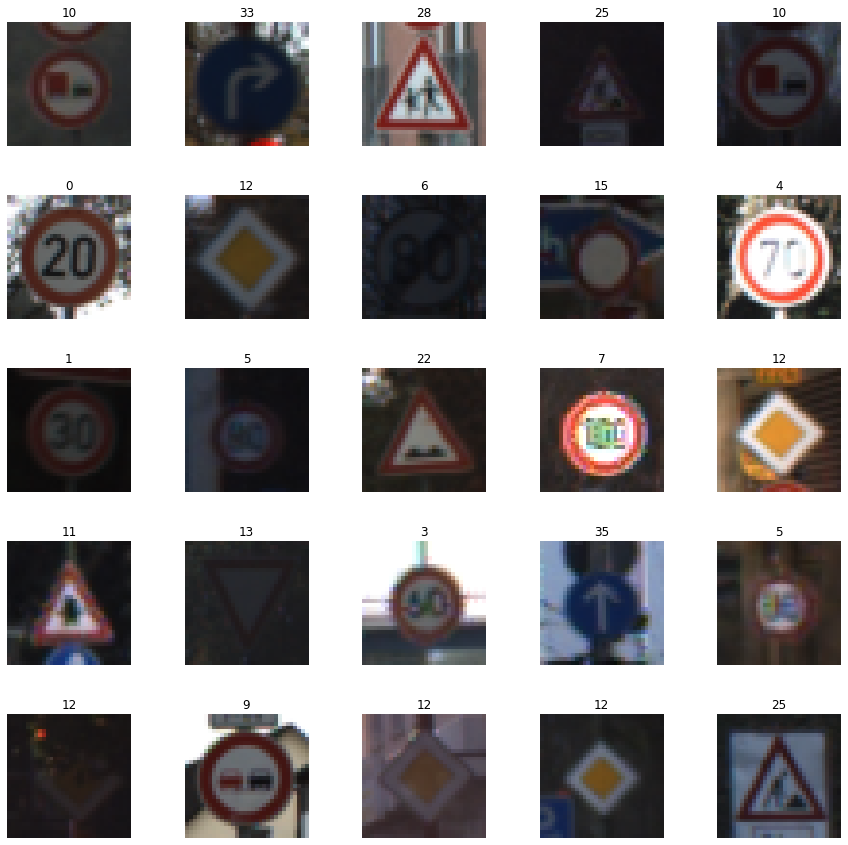

In [ ]:
idx = list(np.random.randint(low = 0,
                  high = len(X_train), 
                  size = 26))

fig, axes = plt.subplots(5, 5, figsize = (15, 15))
axes = axes.ravel()

for ind, sbplt in zip(idx, np.arange(0, 5*5)):
    axes[sbplt].imshow(X_train[ind])
    axes[sbplt].axis('off')
    axes[sbplt].set_title(y_train[ind])

plt.subplots_adjust(hspace = .4, wspace = .4)
plt.show()

Data Prep of colored images


*   Convert to grey scale
*   Normalization 
*   Shuffle data to avoid overfitting



In [ ]:
from sklearn.utils import shuffle

In [ ]:
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
X_train[0]

array([[[255, 254, 220],
        [255, 254, 221],
        [254, 253, 222],
        ...,
        [234, 230, 201],
        [224, 213, 189],
        [215, 207, 185]],

       [[255, 253, 219],
        [255, 253, 219],
        [254, 251, 220],
        ...,
        [227, 214, 186],
        [204, 202, 179],
        [171, 174, 155]],

       [[255, 253, 217],
        [254, 251, 215],
        [254, 248, 215],
        ...,
        [198, 183, 163],
        [199, 183, 162],
        [182, 171, 154]],

       ...,

       [[191, 181, 159],
        [186, 177, 155],
        [178, 170, 148],
        ...,
        [ 67,  59,  57],
        [ 63,  56,  56],
        [ 60,  54,  54]],

       [[139, 132, 118],
        [131, 126, 114],
        [119, 117, 105],
        ...,
        [ 53,  44,  44],
        [ 52,  45,  43],
        [ 50,  43,  42]],

       [[ 86,  79,  74],
        [ 84,  78,  73],
        [ 80,  76,  72],
        ...,
        [ 48,  36,  35],
        [ 48,  37,  34],
        [ 49,  39,  36]]

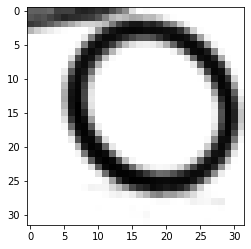

In [ ]:
plt.imshow(np.sum(X_train[0]/3, axis = 2, keepdims = True).squeeze(), cmap = 'gray')

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)

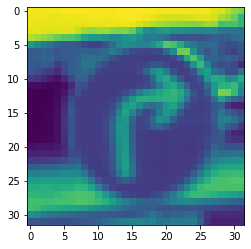

In [ ]:
plt.imshow(X_train_gray[0].squeeze())

In [ ]:
X_train_gray[0]

array([[[243.        ],
        [243.33333333],
        [243.        ],
        ...,
        [221.66666667],
        [208.66666667],
        [202.33333333]],

       [[242.33333333],
        [242.33333333],
        [241.66666667],
        ...,
        [209.        ],
        [195.        ],
        [166.66666667]],

       [[241.66666667],
        [240.        ],
        [239.        ],
        ...,
        [181.33333333],
        [181.33333333],
        [169.        ]],

       ...,

       [[177.        ],
        [172.66666667],
        [165.33333333],
        ...,
        [ 61.        ],
        [ 58.33333333],
        [ 56.        ]],

       [[129.66666667],
        [123.66666667],
        [113.66666667],
        ...,
        [ 47.        ],
        [ 46.66666667],
        [ 45.        ]],

       [[ 79.66666667],
        [ 78.33333333],
        [ 76.        ],
        ...,
        [ 39.66666667],
        [ 39.66666667],
        [ 41.33333333]]])

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_valid_gray_norm = (X_valid_gray - 128) / 128

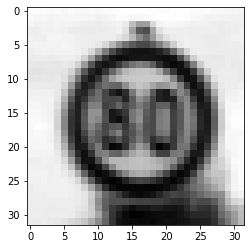

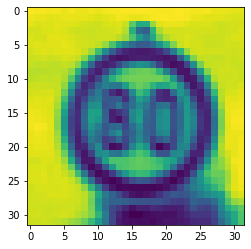

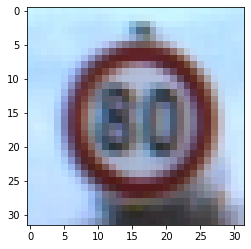

In [ ]:
i_ = np.random.randint(low = 0, high = len(X_train_gray_norm))

plt.imshow(X_train_gray[i_].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train_gray[i_].squeeze())
plt.figure()
plt.imshow(X_train[i_])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
input_shape = X_train_gray_norm.shape[1:]

In [ ]:
input_shape

(32, 32, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu', input_shape = input_shape))
model.add(AveragePooling2D()) # model.add(MaxPooling2D())
# model.add(Dropout(.2))

model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu'))
model.add(AveragePooling2D()) # model.add(MaxPooling2D())
# model.add(Dropout(.2))

model.add(Flatten())

model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dense(units = 43, activation = 'softmax'))

model.compile(optimizer = Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

earlyStopper = EarlyStopping(monitor = 'val_accuracy', patience = 2)

history = model.fit(x = X_train_gray_norm, y = y_train, batch_size = 500, epochs = 50, validation_data = (X_valid_gray_norm, y_valid), callbacks = [earlyStopper])

Epoch 1/50
70/70 [==============================] - 15s 214ms/step - loss: 3.1743 - accuracy: 0.1804 - val_loss: 2.7074 - val_accuracy: 0.3388
Epoch 2/50
70/70 [==============================] - 15s 214ms/step - loss: 1.6925 - accuracy: 0.5347 - val_loss: 1.3338 - val_accuracy: 0.6132
Epoch 3/50
70/70 [==============================] - 15s 218ms/step - loss: 0.8845 - accuracy: 0.7490 - val_loss: 0.9456 - val_accuracy: 0.7240
Epoch 4/50
70/70 [==============================] - 15s 219ms/step - loss: 0.6099 - accuracy: 0.8344 - val_loss: 0.7865 - val_accuracy: 0.7782
Epoch 5/50
70/70 [==============================] - 15s 219ms/step - loss: 0.4779 - accuracy: 0.8731 - val_loss: 0.7414 - val_accuracy: 0.7803
Epoch 6/50
70/70 [==============================] - 15s 219ms/step - loss: 0.3957 - accuracy: 0.8984 - val_loss: 0.6695 - val_accuracy: 0.8179
Epoch 7/50
70/70 [==============================] - 16s 223ms/step - loss: 0.3367 - accuracy: 0.9153 - val_loss: 0.6660 - val_accuracy: 0.8254

In [ ]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

# Model Evaluation

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['loss']

[3.1743240356445312,
 1.6924736499786377,
 0.8844590187072754,
 0.6098619103431702,
 0.47794780135154724,
 0.3957492411136627,
 0.3366858959197998,
 0.29061344265937805,
 0.25828760862350464,
 0.2331572324037552]

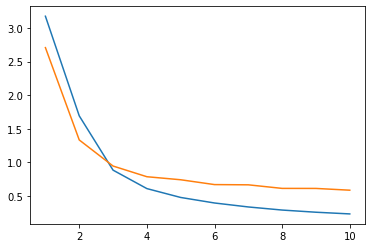

In [ ]:
sns.lineplot(x = np.arange(1,11), y = history.history['loss'])
sns.lineplot(x = np.arange(1,11), y = history.history['val_loss'])

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

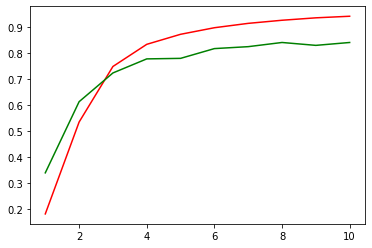

In [ ]:
sns.lineplot(x = np.arange(1,11), y = history.history['accuracy'], c = 'r')
sns.lineplot(x = np.arange(1,11), y = history.history['val_accuracy'], c = 'g')



In [ ]:
test_acc = model.evaluate(X_test_gray_norm, y_test)

print(f'Test Accuracy: {str(round(test_acc[1], 3)*100)}%')

395/395 [==============================] - 4s 10ms/step - loss: 0.8290 - accuracy: 0.8446
Test Accuracy: 84.5%


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
preds = model.predict_classes(X_test_gray_norm)
cm = confusion_matrix(y_test, preds)
cm

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[ 23,  29,   0, ...,   0,   0,   0],
       [  8, 660,  18, ...,   1,   0,   0],
       [  0,  58, 599, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  67,   0,   0],
       [  0,   0,   0, ...,   0,  37,   0],
       [  0,   0,   0, ...,   0,  24,  56]])

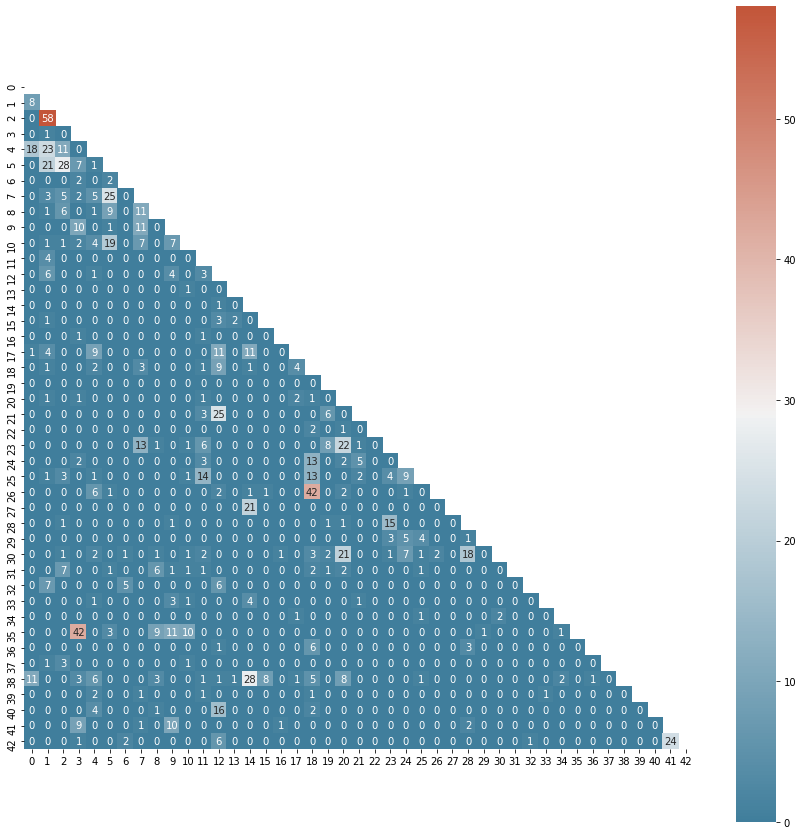

In [ ]:
mask = np.triu(np.ones_like(cm, dtype = bool))
f, ax = plt.subplots(figsize = (15, 15))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(cm, mask = mask, cmap = cmap, square = True, annot = True)